In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#### No Missing values in the dataset 

In [5]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Exlporing data

In [8]:
df.select_dtypes(include = object).apply(lambda x:x.unique(), axis=0)

gender                                                            [female, male]
race/ethnicity                     [group B, group C, group A, group D, group E]
parental level of education    [bachelor's degree, some college, master's deg...
lunch                                                   [standard, free/reduced]
test preparation course                                        [none, completed]
dtype: object

##### creating lists for numerical and categorical features

In [9]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != object]
categorical_features = [features for features in df.columns if df[features].dtype==object]
print(categorical_features)
print(numerical_features)

['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
['math score', 'reading score', 'writing score']


In [10]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average score'] = df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [61]:
maths_full = df[df['math score']==100]['average score'].count()
reading_full = df[df['reading score']==100]['average score'].count()
writing_full = df[df['writing score']==100]['average score'].count()

print(f"number of students with full marks\nmath : {maths_full}\nwriting : {writing_full}\nreading : {reading_full}")

number of students with full marks
math : 7
writing : 14
reading : 17


In [13]:
maths_20 = df[df['math score']<=20]['average score'].count()
reading_20 = df[df['reading score']<=20]['average score'].count()
writing_20 = df[df['writing score']<=20]['average score'].count()

print(f"number of students within 20 marks\nmath : {maths_20}\nreading : {reading_20}\nwriting : {writing_20}")

number of students within 20 marks
math : 4
reading : 1
writing : 3


Text(0.5, 1.0, 'male vs female')

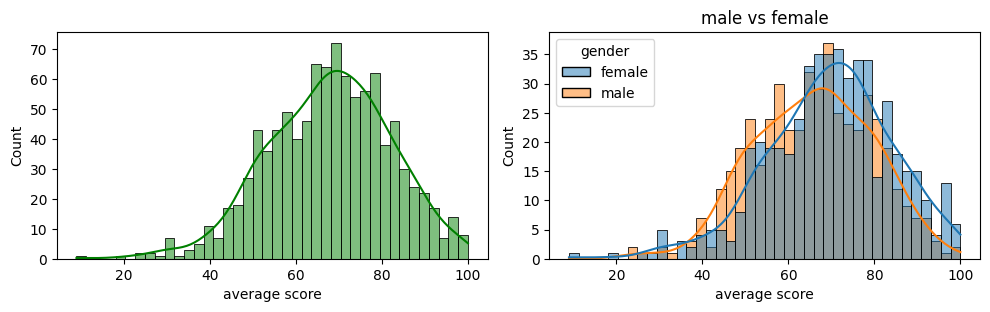

In [14]:
fig,ax = plt.subplots(1,2,figsize=(10,3))
sns.histplot(data=df,x='average score',bins=40,kde=True,ax=ax[0],color='green')
sns.histplot(data=df,x='average score',bins=40,kde=True,hue='gender',ax=ax[1])
plt.tight_layout()
ax[1].set_title('male vs female')


#### Insights :  Female students tend to perform well than male students

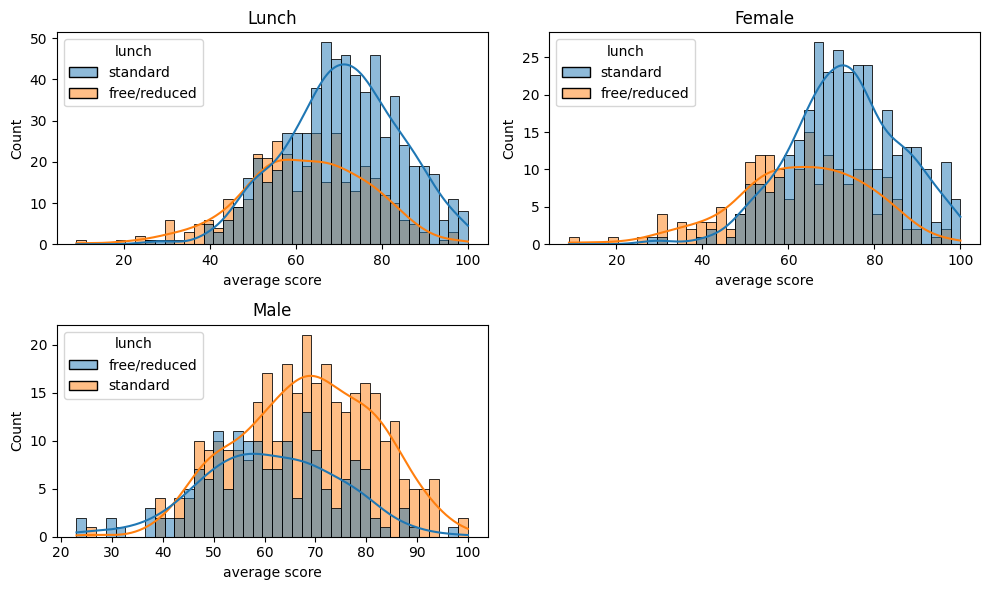

In [15]:
fig,ax = plt.subplots(2,2,figsize=(10,6))
sns.histplot(data=df,x='average score',hue='lunch',kde=True,bins=40,ax=ax[0,0])
sns.histplot(data=df[df['gender']=='female'],x='average score',kde=True,bins=40,hue='lunch',ax=ax[0,1])
sns.histplot(data=df[df['gender']=='male'],x='average score',hue='lunch',kde=True,bins=40,ax=ax[1,0])
ax[1,1].axis('off')
ax[0,0].set_title('Lunch')
ax[0,1].set_title('Female')
ax[1,0].set_title('Male')
plt.tight_layout()


##### Insights : Standard lunch helps perform well in the exam and students obtaing standard lunch are more in count

Text(0.5, 1.0, 'Male')

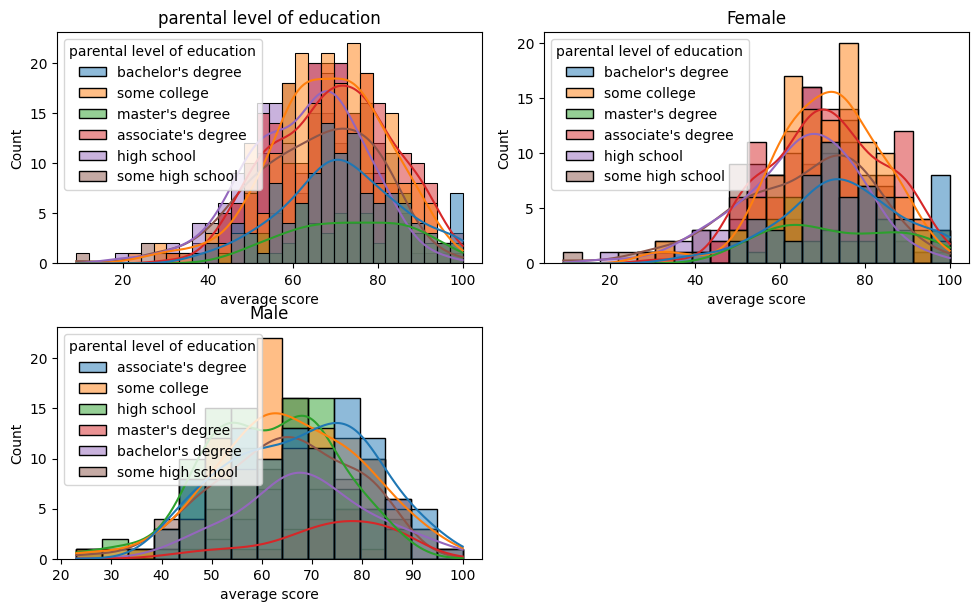

In [16]:
fig,ax = plt.subplots(2,2,figsize=(10,6))
sns.histplot(data=df, x='average score',hue='parental level of education' ,kde=True, bins=30, color='green',ax=ax[0,0])
sns.histplot(data=df[df['gender']=='female'], x='average score',hue='parental level of education',kde=True,ax=ax[0,1])
sns.histplot(data=df[df['gender']=='male'],x='average score',hue='parental level of education',kde=True,ax=ax[1,0])
plt.tight_layout()
ax[1,1].axis('off')
ax[0,0].set_title('parental level of education')
ax[0,1].set_title('Female')
ax[1,0].set_title('Male')


##### Insight : In general parental level of education doesn't determine the average score of the student
##### in 3rd plot male students with parent education - master's & associate's degree have higher performance

Text(0.5, 1.0, 'Male')

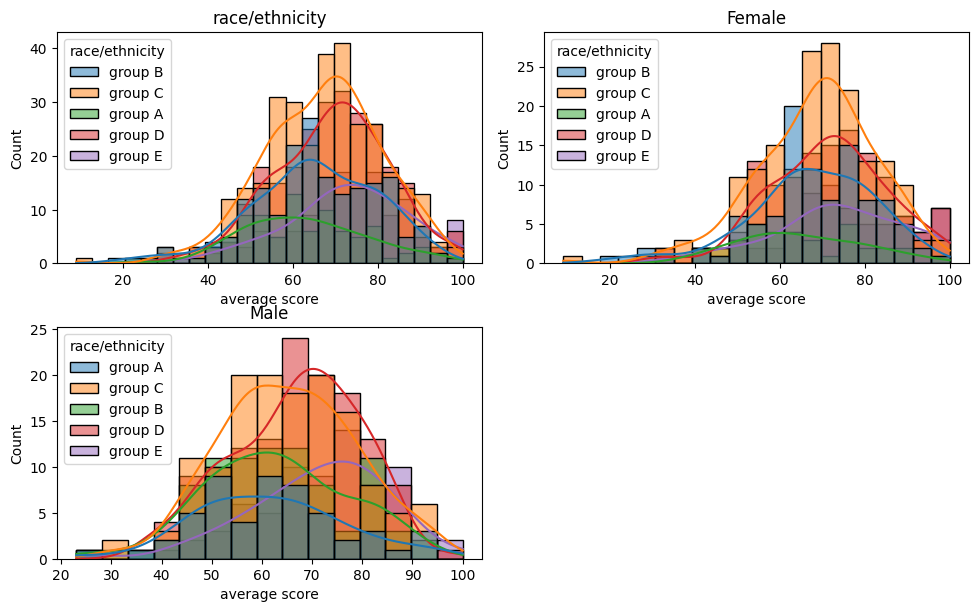

In [17]:
fig,ax = plt.subplots(2,2,figsize=(10,6))
sns.histplot(data=df, x='average score', hue='race/ethnicity', kde=True, ax=ax[0,0],color='green')
sns.histplot(data=df[df['gender']=='female'],x='average score',hue='race/ethnicity',kde=True,ax=ax[0,1])
sns.histplot(data=df[df['gender']=='male'],x='average score',hue='race/ethnicity',kde=True,ax=ax[1,0])
plt.tight_layout()
ax[1,1].axis('off')
ax[0,0].set_title('race/ethnicity')
ax[0,1].set_title('Female')
ax[1,0].set_title('Male')

##### Insights : Male students belonging to group E has scored good scores
#####            Students belonging to group A and B perform poorly irrespective of gender

#### Student scores

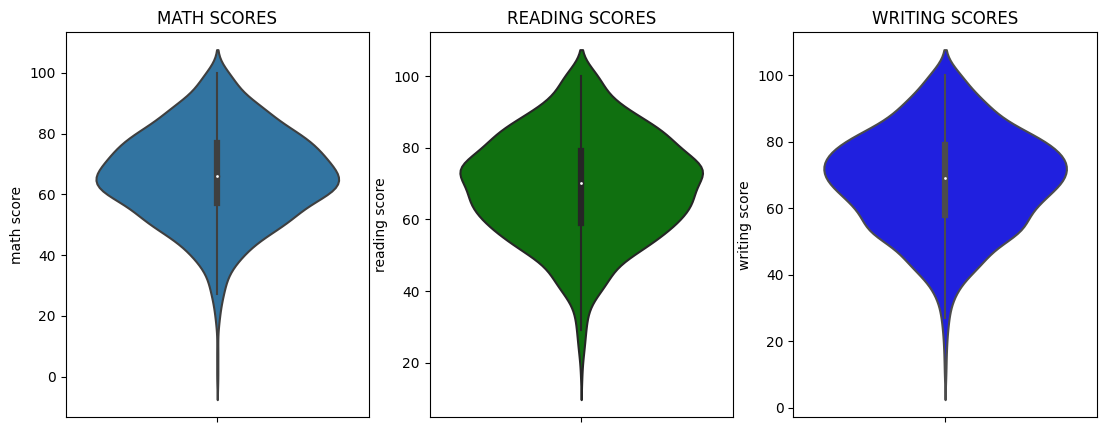

In [18]:
plt.figure(figsize=(18,5))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green')
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',showmeans=False,showmedian=True)
plt.show()

#### Multivariate analysis

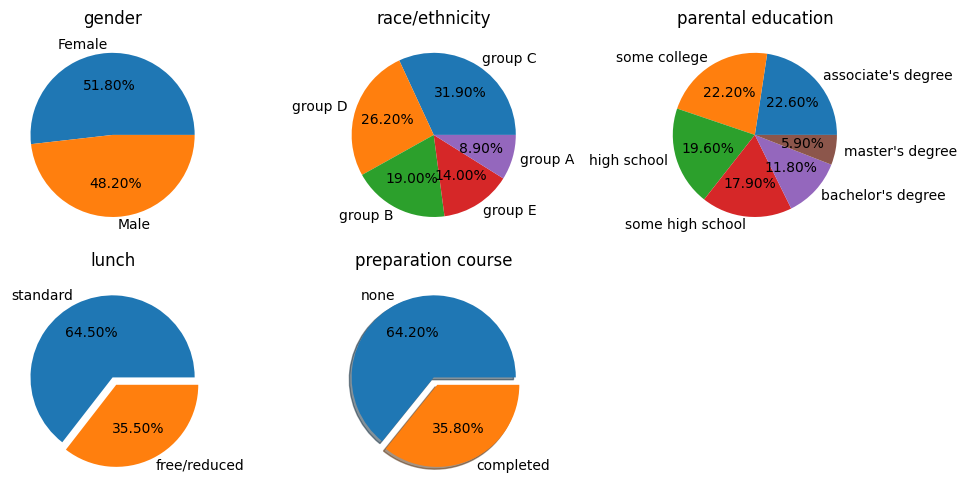

In [19]:
fig,ax = plt.subplots(2,3,figsize=(10,5))
ax[0,0].pie(x=df['gender'].value_counts(), labels=['Female','Male'],autopct="%.2f%%")
ax[0,1].pie(x=df['race/ethnicity'].value_counts(),labels=['group C','group D','group B','group E','group A'],autopct='%.2f%%')
edu_list = ["associate's degree",'some college','high school','some high school',"bachelor's degree","master's degree"]
ax[0,2].pie(x=df['parental level of education'].value_counts(),labels=edu_list,autopct="%.2f%%")
ax[1,0].pie(x=df['lunch'].value_counts(),labels=['standard','free/reduced'],autopct="%.2f%%",explode=[0,0.1])
ax[1,1].pie(x=df['test preparation course'].value_counts(),labels=['none','completed'],autopct='%.2f%%',shadow=True,explode=[0,0.1])
ax[1,2].axis('off')
ax[0,0].set_title('gender') ; ax[0,1].set_title('race/ethnicity') ; ax[0,2].set_title('parental education') ; ax[1,0].set_title('lunch')
ax[1,1].set_title('preparation course')
plt.grid()
plt.tight_layout()


#### Univariate Analysis (Gender)

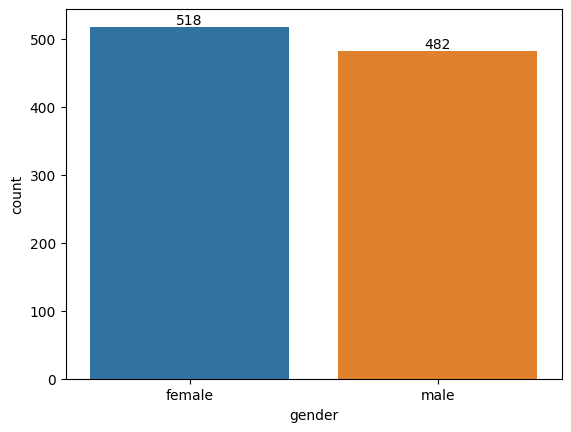

In [20]:
plot = sns.countplot(x=df['gender'])
for container in plot.containers:
    plot.bar_label(container,color='black')

##### Bivariate analysis (gender)

In [21]:
gender_scores = df.groupby('gender')
male_scores = [gender_scores['average score'].mean().values[1],gender_scores['math score'].mean().values[1]]
female_scores = [gender_scores['average score'].mean().values[0],gender_scores['math score'].mean().values[0]]
male_scores,female_scores

([65.8374827109267, 68.72821576763485],
 [69.56949806949807, 63.633204633204635])

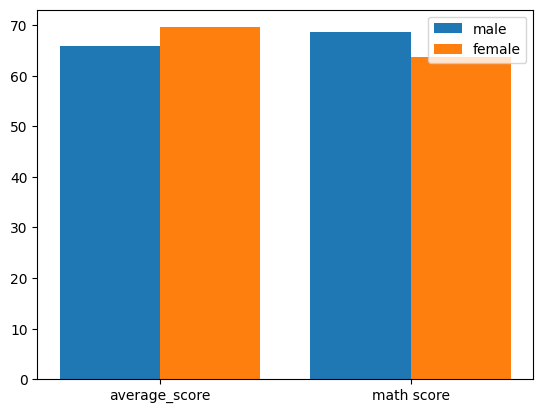

In [22]:
x_axis = np.arange(len(male_scores))
plt.bar(x_axis-0.2,male_scores,0.4,label='male')
plt.bar(x_axis+0.2,female_scores,0.4,label='female')
plt.xticks(x_axis,['average_score','math score'])
plt.legend()

##### univariate analysis (race/ethnicity)

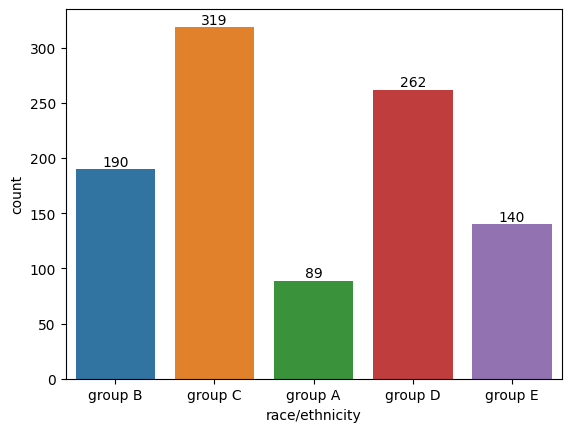

In [23]:
plot = sns.countplot(x=df['race/ethnicity'])
for container in plot.containers:
    plot.bar_label(container, color='black')

##### Bivariate analysis (race/ethnicity)

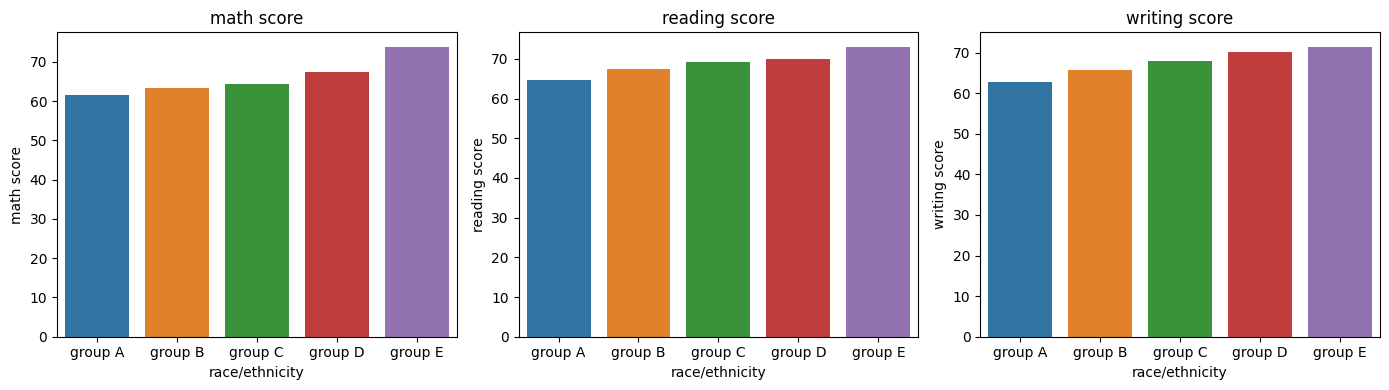

In [24]:
race_grp = df.groupby('race/ethnicity')
fig,ax = plt.subplots(1,3,figsize=(14,4))
sns.barplot(x=race_grp['math score'].mean().index,y=race_grp['math score'].mean(),ax=ax[0])
ax[0].set_title('math score')
sns.barplot(x=race_grp['reading score'].mean().index,y=race_grp['reading score'].mean(),ax=ax[1])
ax[1].set_title('reading score')
sns.barplot(x=race_grp['writing score'].mean().index,y=race_grp['writing score'].mean(),ax=ax[2])
ax[2].set_title('writing score')
plt.tight_layout()

##### Insights : group D & E has performed well in all three courses comperataviely

##### univariate analysis (parental level of education)

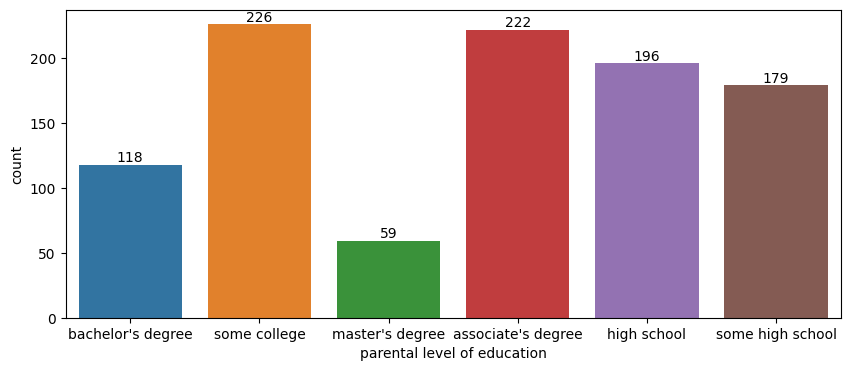

In [25]:
plt.figure(figsize=(10,4))
plot = sns.countplot(x=df['parental level of education'])
for container in plot.containers:
    plot.bar_label(container)

##### Bivariate analysis (parental level of education)

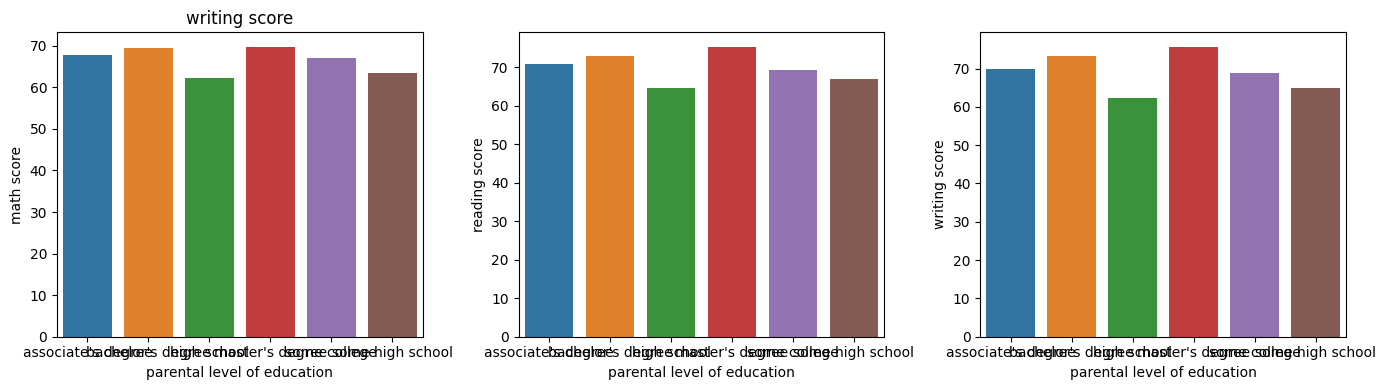

In [26]:
parent_grp = df.groupby('parental level of education')
fig,ax = plt.subplots(1,3,figsize=(14,4))
sns.barplot(x=parent_grp['math score'].mean().index,y=parent_grp['math score'].mean(),ax=ax[0])
ax[0].set_title('math score')
sns.barplot(x=parent_grp['reading score'].mean().index,y=parent_grp['reading score'].mean(),ax=ax[1])
ax[0].set_title('reading score')
sns.barplot(x=parent_grp['writing score'].mean().index,y=parent_grp['writing score'].mean(),ax=ax[2])
ax[0].set_title('writing score')
plt.tight_layout()

In [27]:
df.groupby('parental level of education').agg({'math score':'mean','reading score':'mean','writing score':'mean'})

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


<Axes: ylabel='parental level of education'>

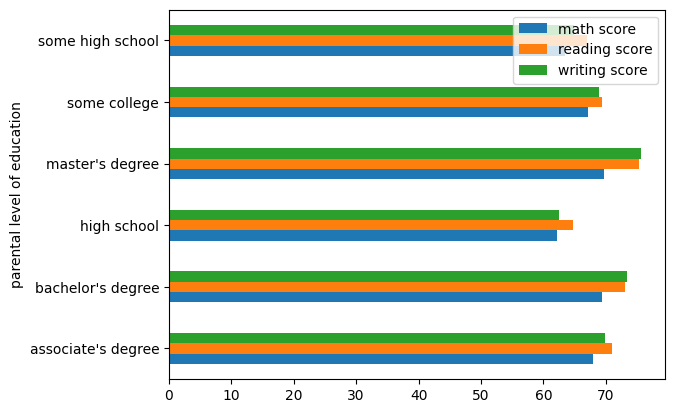

In [28]:
df.groupby('parental level of education').agg({'math score':'mean','reading score':'mean','writing score':'mean'}).plot(kind='barh')

##### students of parents with master's and bachelor's degree have scored highest marks

##### univariate analysis (lunch)

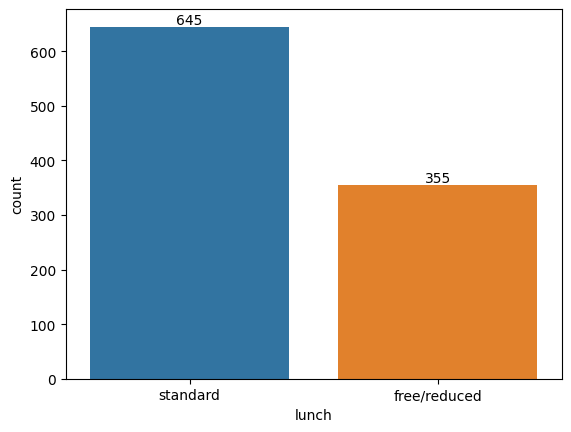

In [29]:
plot = sns.countplot(x=df['lunch'])
for container in plot.containers:
    plot.bar_label(container)

##### Bivariate analysis (lunch)

In [30]:
df.groupby('lunch').agg({'math score':'mean','reading score':'mean','writing score':'mean'})

,math score,reading score,writing score
lunch,,,
free/reduced,58.921127,64.653521,63.022535
standard,70.034109,71.654264,70.823256


<Axes: ylabel='lunch'>

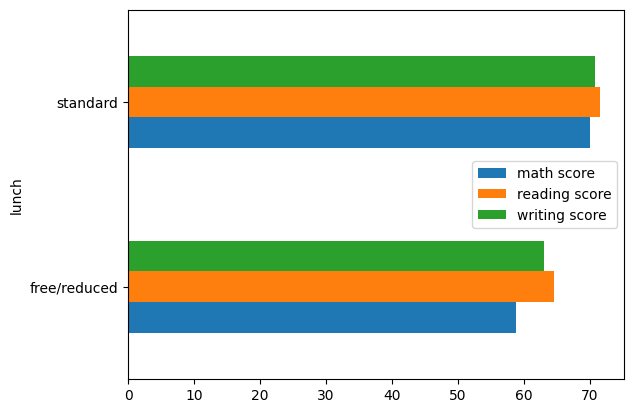

In [31]:
df.groupby('lunch').agg({'math score':'mean','reading score':'mean','writing score':'mean'}).plot(kind='barh')

##### Insights : students provoded with standard lunch tend to perform well

In [32]:
df.groupby('test preparation course').agg({'math score':'mean','writing score':'mean','reading score':'mean'})

,math score,writing score,reading score
test preparation course,,,
completed,69.695531,74.418994,73.893855
none,64.077882,64.504673,66.534268


<Axes: ylabel='test preparation course'>

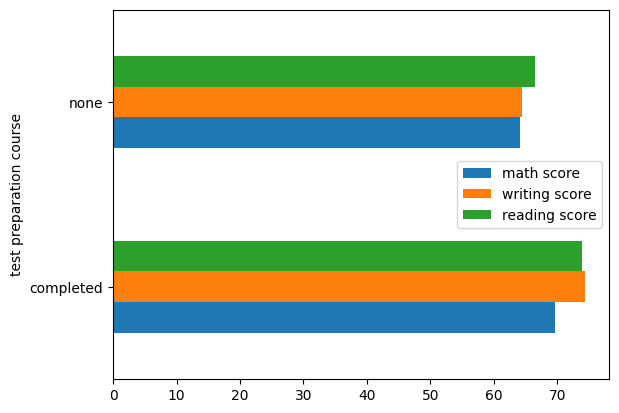

In [34]:
df.groupby('test preparation course').agg({'math score':'mean','writing score':'mean','reading score':'mean'}).plot(kind='barh')

##### Checking outliers

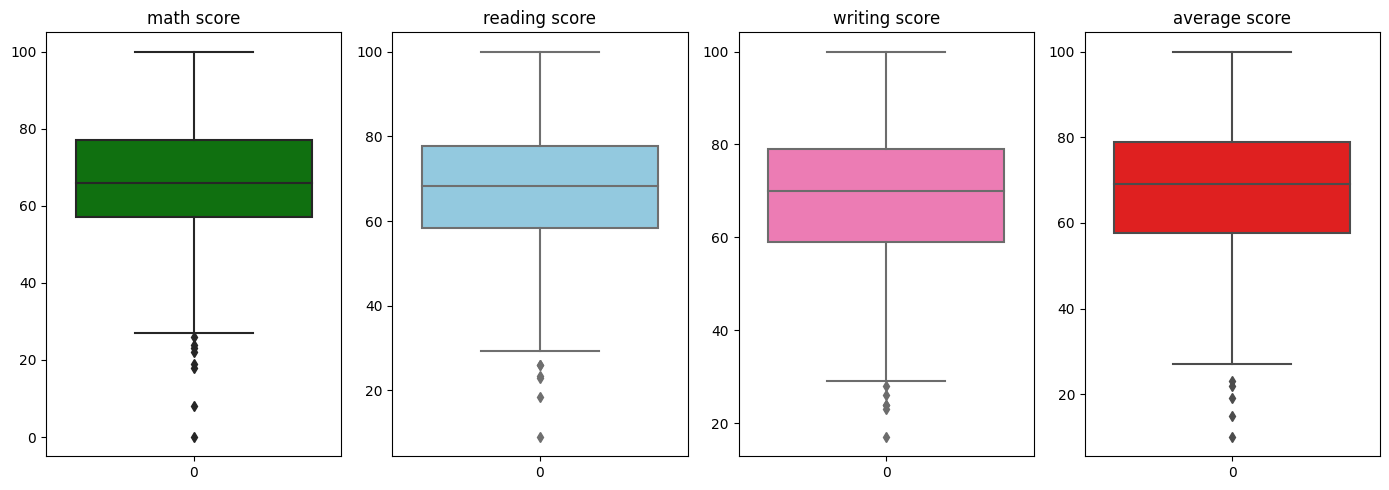

In [43]:
fig,ax = plt.subplots(1,4,figsize=(14,5))
sns.boxplot(data=df['math score'],ax=ax[0],color='green')
ax[0].set_title('math score')
sns.boxplot(data=df['reading score'],ax=ax[2],color='hotpink')
ax[1].set_title('reading score')
sns.boxplot(data=df['writing score'],ax=ax[3],color='red')
ax[2].set_title('writing score')
sns.boxplot(data=df['average score'],ax=ax[1],color='skyblue')
ax[3].set_title('average score')
plt.tight_layout()

##### Multivariate analysis

/home/darnesh/ML Project/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


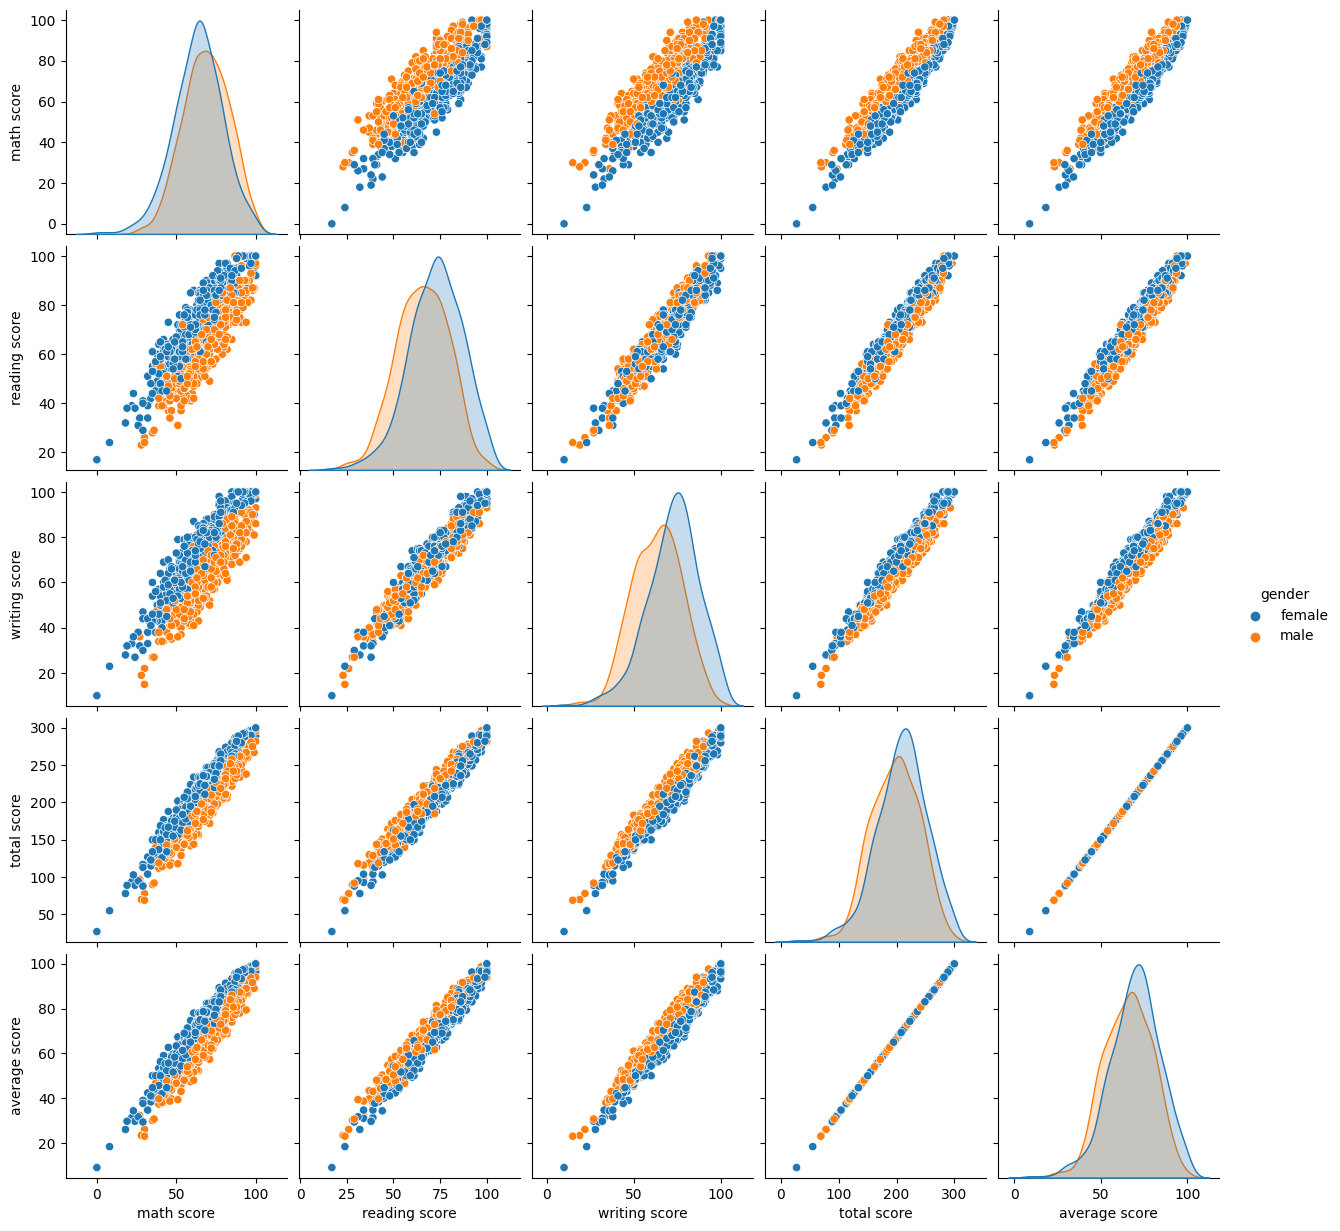

In [66]:
sns.pairplot(data=df,hue='gender')